# Practicum 7: Clustering

## Task 3: Implementing Hierarchical Agglomerative Clustering

  - Cluster the "Italian cities" dataset (from Lecture 5) using Hierarchical Agglomerative Clustering
  - Implement the Single link (MIN), Complete link (MAX), and Group average methods for comparing cluster proximities
  - Bonus: visualize the different clusterings using dendrograms

In [1]:
%matplotlib inline

In [2]:
import sys

# There imports are needed for visualizing the clustering using dendrograms
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

Cities and distances between them

In [3]:
cities = ["BA", "FI", "MI", "NA", "RM", "TO"]

dist = [[0, 662, 877, 255, 412, 996],
        [662, 0, 295, 468, 268, 400],
        [877, 295, 0, 754, 564, 138],
        [255, 468, 754, 0, 219, 869],
        [412, 268, 564, 219, 0, 669],
        [996, 400, 138, 869, 669, 0]]

Find the closest pair of clusters based on a proximity matrix.

Return a triple: cluster index 1, cluster index 2, and distance between cluster 1 and 2.

In [4]:
def closest(prox):
    min_dist = sys.maxsize
    best_c1 = 0
    best_c2 = 0
    for i in range(len(prox)):
        for j in range(len(prox)):
            if prox[i][j] > 0 and prox[i][j] < min_dist:
                min_dist = prox[i][j]
                best_c1 = i
                best_c2 = j
    return best_c1, best_c2, min_dist

Compute the distance between two clusters.

  - `dist` is the distance matrix between the data points
  - `c1` is the list of data points (indices) belonging to cluster 1
  - `c2` is the list of data points (indices) belonging to cluster 219
  - `linkage` is "min", "max", or "avg"

In [5]:
def cdist(dist, c1, c2, linkage):
    d = 0
    if len(c1) > 0 and len(c2) > 0:  # only if both clusters are non-empty
        if linkage == "min":
            d = sys.maxsize
            for i1 in c1:
                for i2 in c2:
                    if dist[i1][i2] < d:
                        d = dist[i1][i2]
        if linkage == "max":
            d = 0
            for i1 in c1:
                for i2 in c2:
                    if dist[i1][i2] > d:
                        d = dist[i1][i2]
        if linkage == "avg":
            sum = 0
            num = 0
            for i1 in c1:
                for i2 in c2:
                    if dist[i1][i2] > d:
                        sum += dist[i1][i2]
                        num += 1
            d = sum / num if num > 0 else 0
    return d

Perform Hierarchical Agglomerative Clustering
  - `dist` is a distance matrix
  - `linkage` can be "min" (single link), "max" (complete link), or "avg" (group average)

In [6]:
def hac(dist, linkage):
    # Clusters are represented as a list of data points belonging to that cluster
    clusters = []
    # Each data point is a singleton cluster initially
    for i in range(len(dist)):
        clusters.append([i])

    # Compute initial promiximity matrix
    prox = []
    for c1 in clusters:
        c1dist = []  # the row in the proximity matrix corresponding to cluster 1
        for c2 in clusters:
            c1dist.append(cdist(dist, c1, c2, linkage))
        prox.append(c1dist)

    linkages = []
    
    # Repeat until only one cluster remains
    num = len(clusters)
    while num > 1:
        # Find the closest two clusters
        c1, c2, min_dist = closest(prox)

        # Merge the closest two clusters
        clusters.append(clusters[c1] + clusters[c2])
        # "empty" the clusters that are being merged
        clusters[c1] = []
        clusters[c2] = []
    
        # Update the proximity matrix
        # Zero out the rows and columns corresponding to the old clusters (that are being merged)
        for i in range(len(prox)):
            prox[i][c1] = 0
            prox[i][c2] = 0
            prox[c1][i] = 0
            prox[c2][i] = 0

        # Add new column and row corresponding to the new cluster        
        cnew = len(clusters) - 1  # index of the new matrix
        cnewdist = []  # the row in the proximity matrix corresponding to the new cluster
        for i in range(cnew):
            d = cdist(dist, clusters[i], clusters[cnew], linkage)
            prox[i].append(d)  # append column to row i
            cnewdist.append(d) 
        # append new row to proximity matrix        
        prox.append(cnewdist + [0])  # distance from itself is 0 by definition

        linkages.append([c1, c2, min_dist, len(clusters[cnew])])
        num -= 1    

    # Return the linkages for visualization
    return linkages

## Main

Cluster data with the three different linkage methods

In [7]:
linkages_min = hac(dist, "min")
linkages_max = hac(dist, "max")
linkages_avg = hac(dist, "avg")

Visualize the clusterings using dendrograms

(See http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html on how to construct the linkage matrix.)

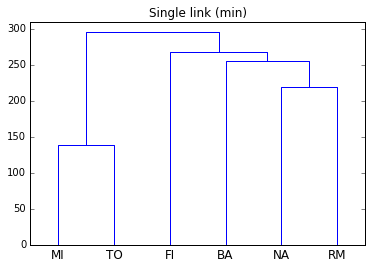

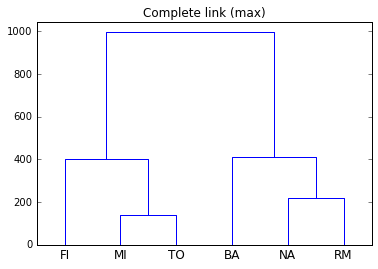

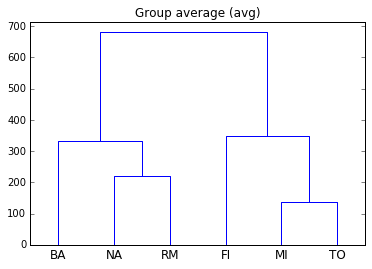

In [8]:
linkage_matrix = np.array(linkages_min)
plt.clf()
plt.title("Single link (min)")
dendrogram(linkage_matrix.astype(float),
           color_threshold=1,
           labels=cities,
           show_leaf_counts=True)
plt.show()

linkage_matrix = np.array(linkages_max)
plt.clf()
plt.title("Complete link (max)")
dendrogram(linkage_matrix.astype(float),
           color_threshold=1,
           labels=cities,
           show_leaf_counts=True)
plt.show()

linkage_matrix = np.array(linkages_avg)
plt.clf()
plt.title("Group average (avg)")
dendrogram(linkage_matrix.astype(float),
           color_threshold=1,
           labels=cities,
           show_leaf_counts=True)
plt.show()